# 30分後のUSD/JPYの値段を予測する

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [8]:
sys.path.append('../')

from lib import lib

In [9]:
li_currency = ["USDJPY","EURJPY","EURUSD","GBPJPY","CADJPY","CHFJPY","GBPUSD","USDCHF","SEKJPY","NOKJPY",
"EURGBP","USDCAD","TRYJPY","ZARJPY","MXNJPY","TRYUSD","EURTRY","RUBJPY","AUDJPY","NZDJPY",
"AUDUSD","NZDUSD","EURAUD","GBPAUD","AUDCAD","EURNZD","AUDNZD","CNYJPY","HKDJPY","SGDJPY"]

In [10]:
CURRENCY = "USDJPY"
PERIOD = 3 # 予測の間隔
PERIOD2 = 6 # 変化の間隔
PIP = 0.05

In [11]:
target, day = lib.makeTarget(CURRENCY)
dayweek = list(map(lib.dayweek,day))
dayhour = list(map(lib.dayhour,day))

In [12]:
data = lib.makeData(li_currency).values
diffs = lib.diffData(data,PERIOD2)
data = data[PERIOD2:]
data = np.concatenate([data,diffs],1)[max(PERIOD-PERIOD2,0):]

In [13]:
target = lib.diffTarget(target,PERIOD)[max(PERIOD2-PERIOD,0):]

In [14]:
len(data)

6779

In [15]:
len(target)

6779

In [16]:
size = len(target)
dayweek = dayweek[max(PERIOD2,PERIOD):]
dayhour = dayhour[max(PERIOD2,PERIOD):]

In [17]:
data, target = lib.checkDay(data,target,dayweek,dayhour,size)
data = np.array(data)

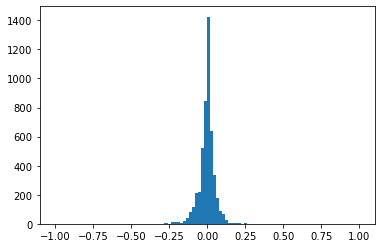

In [18]:
plt.hist(target, range=(-1, 1), bins=100);

In [19]:
target2 = [lib.highlow(i,PIP) for i in target]
target3 = [lib.highlow2(i,PIP) for i in target]
target4 = [lib.highlow3(i,PIP) for i in target]

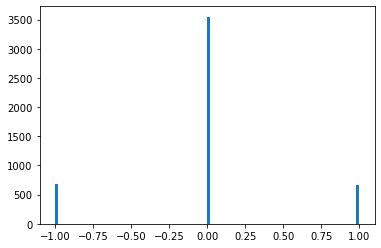

In [20]:
plt.hist(target2, range=(-1, 1), bins=100);

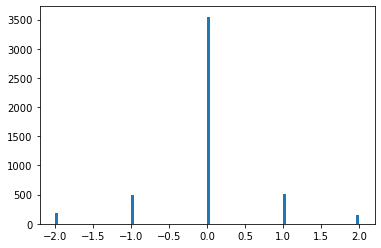

In [21]:
plt.hist(target3, range=(-2, 2), bins=100);

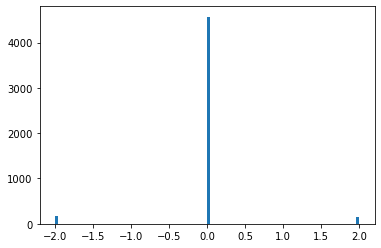

In [22]:
plt.hist(target4, range=(-2, 2), bins=100);

# データ成型は終了

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [25]:
import pickle

0.0004540324349163395
[[1.         0.92784383]
 [0.92784383 1.        ]]


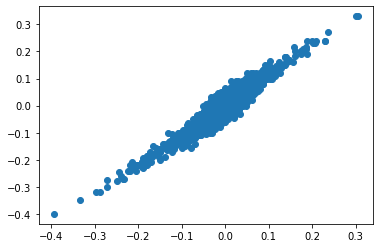

In [26]:
clf = GradientBoostingRegressor(random_state=1, n_estimators=100, max_depth=5)
clf.fit( data, target)
correct = np.array(target)
predict = clf.predict(data)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

In [27]:
filename = "../../models/model/" + CURRENCY + "/r3_0.sav"
pickle.dump(clf, open(filename, 'wb'))